In [1]:
import pandas as pd

## Alucar - Analisando as Vendas

In [6]:
alucar = pd.read_csv('alucar.csv', sep = ',')

In [7]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [14]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [15]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

### Convertendo objeto para data

In [16]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [17]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
print(sns.__version__)

0.11.1


<AxesSubplot:xlabel='mes', ylabel='vendas'>

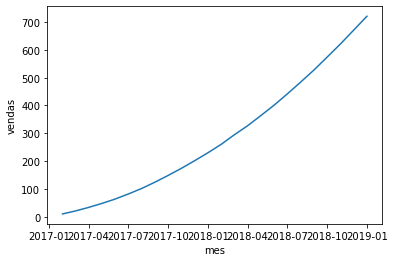

In [23]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

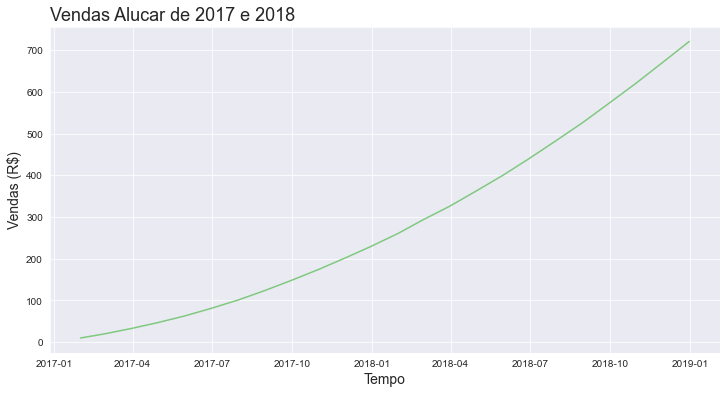

In [89]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc= 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [35]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [37]:
alucar['aumento_vendas'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento_vendas
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


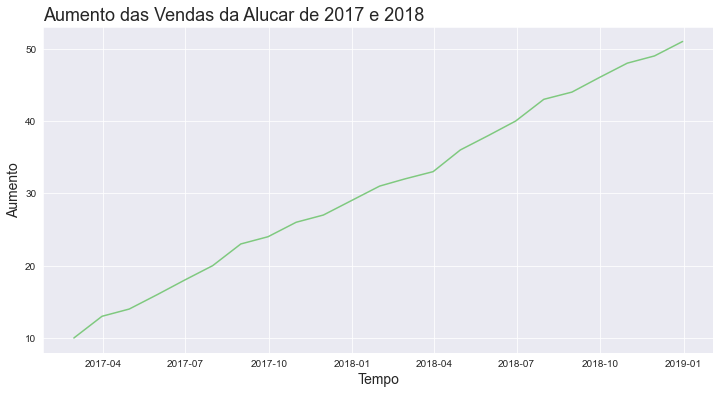

In [42]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento_vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas da Alucar de 2017 e 2018', loc= 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [43]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc= 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

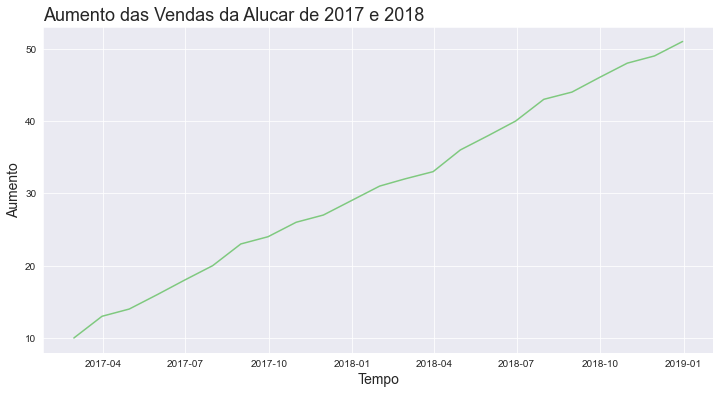

In [45]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento_vendas', alucar)

In [46]:
alucar['aceleracao'] = alucar['aumento_vendas'].diff()
alucar.head()

,mes,vendas,aumento_vendas,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


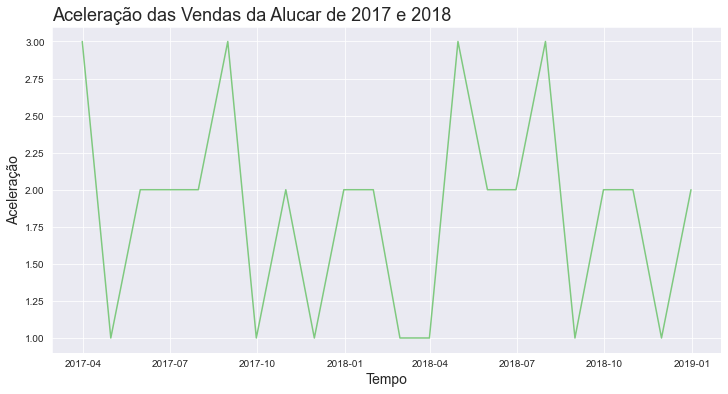

In [47]:
plotar('Aceleração das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

## Juntando os Gráficos em Somente um Plot

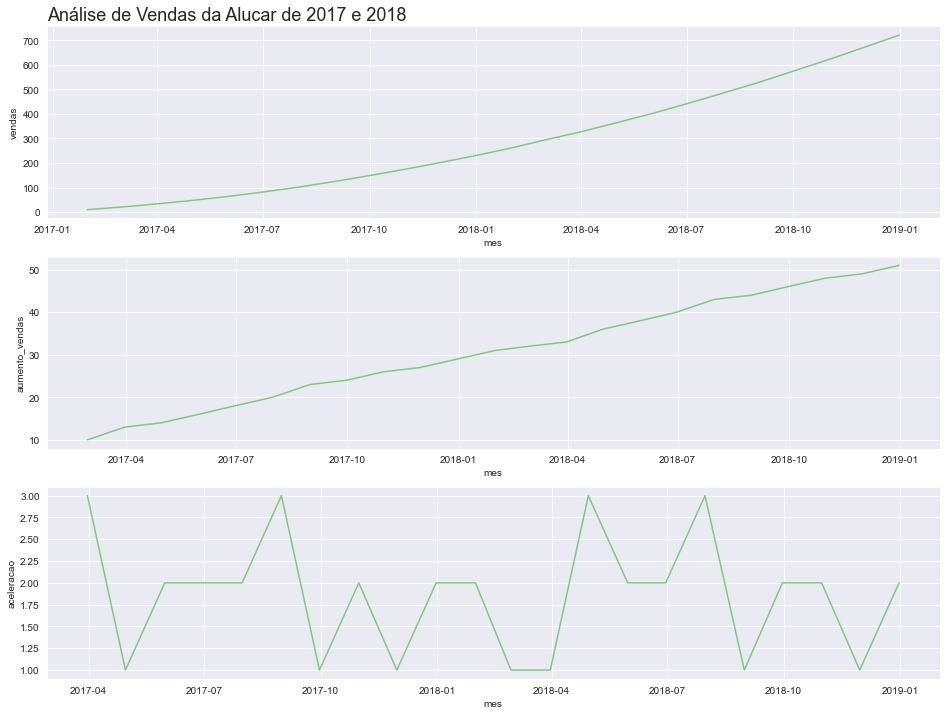

In [52]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize = 18, loc= 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento_vendas', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax 

In [86]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc= 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)
    ax = ax 
    

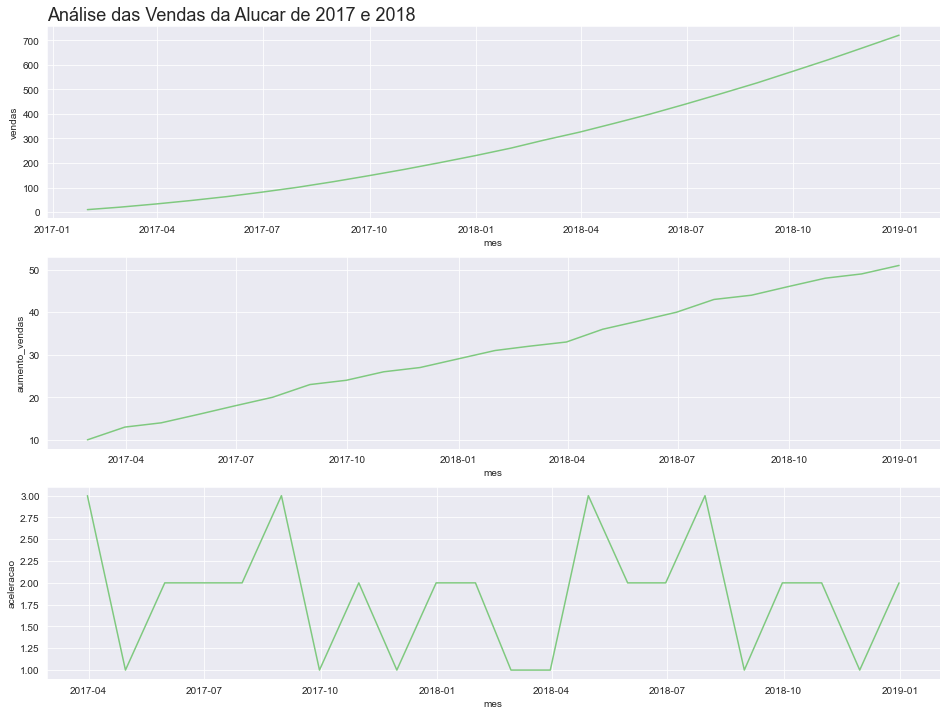

In [57]:
plot_comparacao('mes', 'vendas', 'aumento_vendas', 'aceleracao', alucar, 'Análise das Vendas da Alucar de 2017 e 2018')

In [58]:
from pandas.plotting import autocorrelation_plot

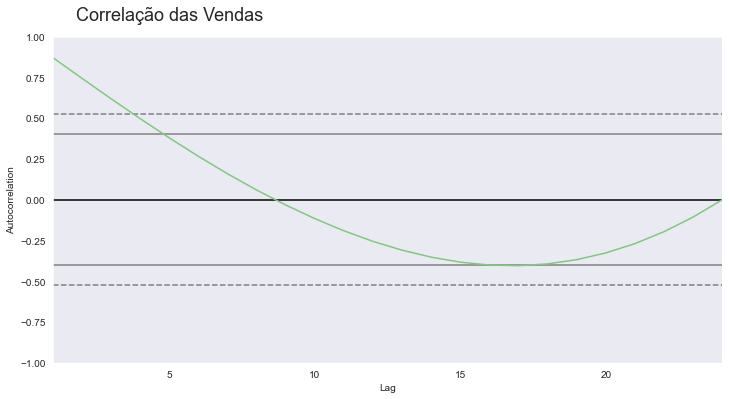

In [65]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x= 0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax 

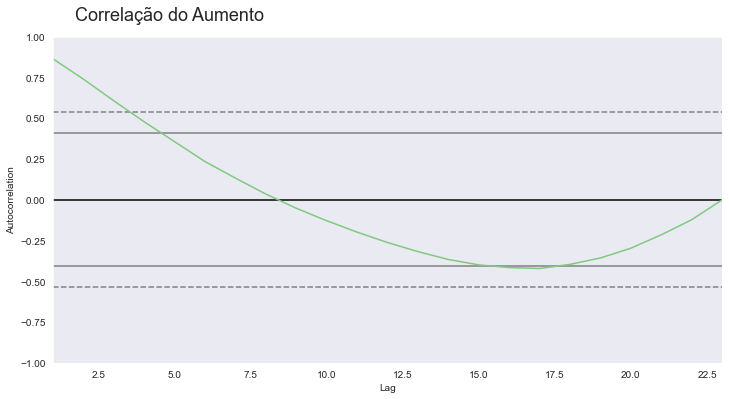

In [67]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x= 0.26, y=0.95)
autocorrelation_plot(alucar['aumento_vendas'][1:])
ax = ax 

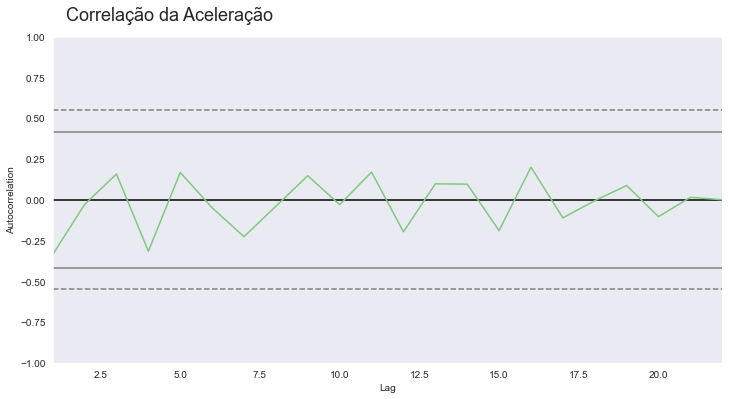

In [68]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x= 0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax 

## Alucar - Analisando Assinantes da Newsletter

In [69]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [71]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [72]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [75]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [73]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [74]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [76]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [77]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


### Pequeno Teste - Bruno

In [78]:
assinantes['assinantes_soma'] = assinantes['aumento'] + assinantes['aceleracao']

In [81]:
assinantes.drop(['assinantes_soma'], axis = 1, inplace = True)

In [82]:
assinantes

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


### Fim do Teste

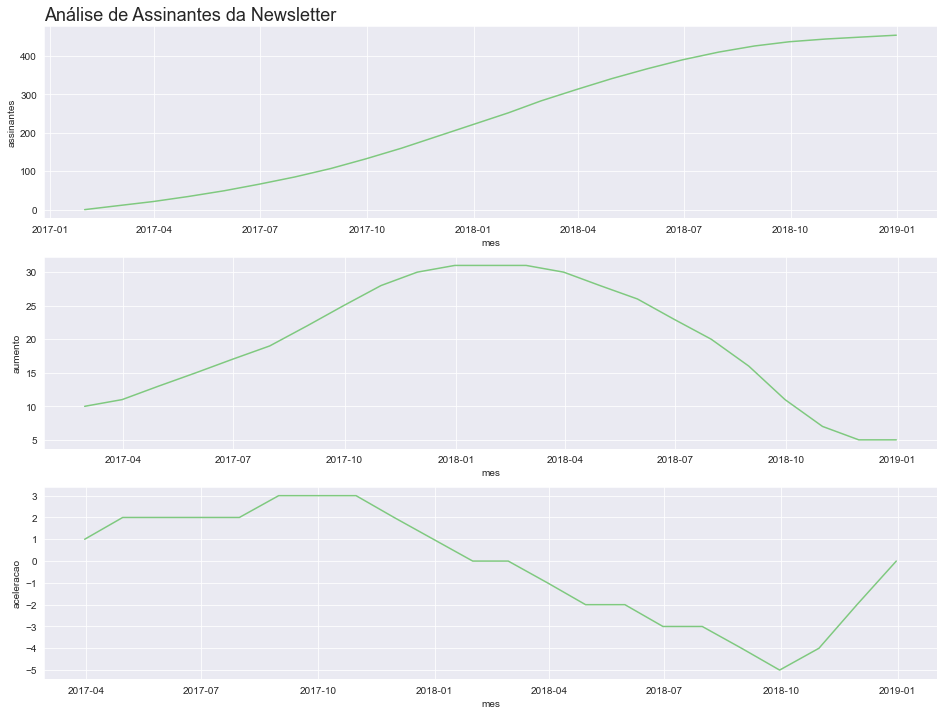

In [87]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinantes da Newsletter')

## Chocolura - Analisando as Vendas

In [90]:
chocolura = pd.read_csv('chocolura.csv')

In [91]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [92]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [93]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [94]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [98]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [99]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [100]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


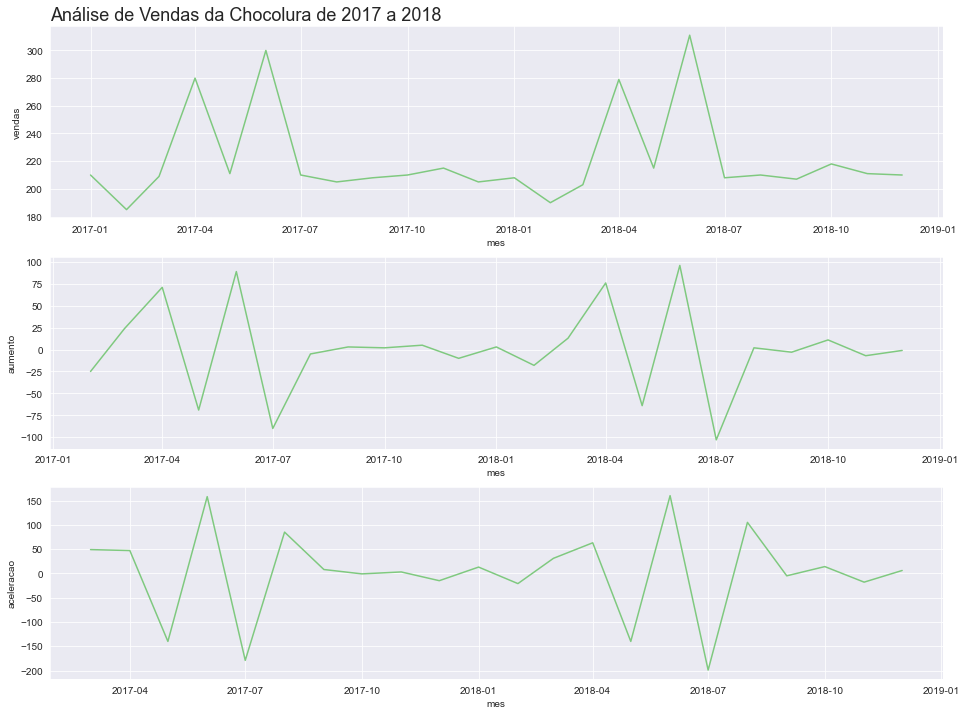

In [102]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 
                chocolura, 'Análise de Vendas da Chocolura de 2017 a 2018')

## Chocolura - Vendas diárias (Outubro e Novembro)

In [103]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')

In [104]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [105]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [106]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [107]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [113]:
vendas_por_dia.dtypes

dia           datetime64[ns]
vendas                 int64
aumento              float64
aceleracao           float64
dtype: object

In [108]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [109]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

In [110]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


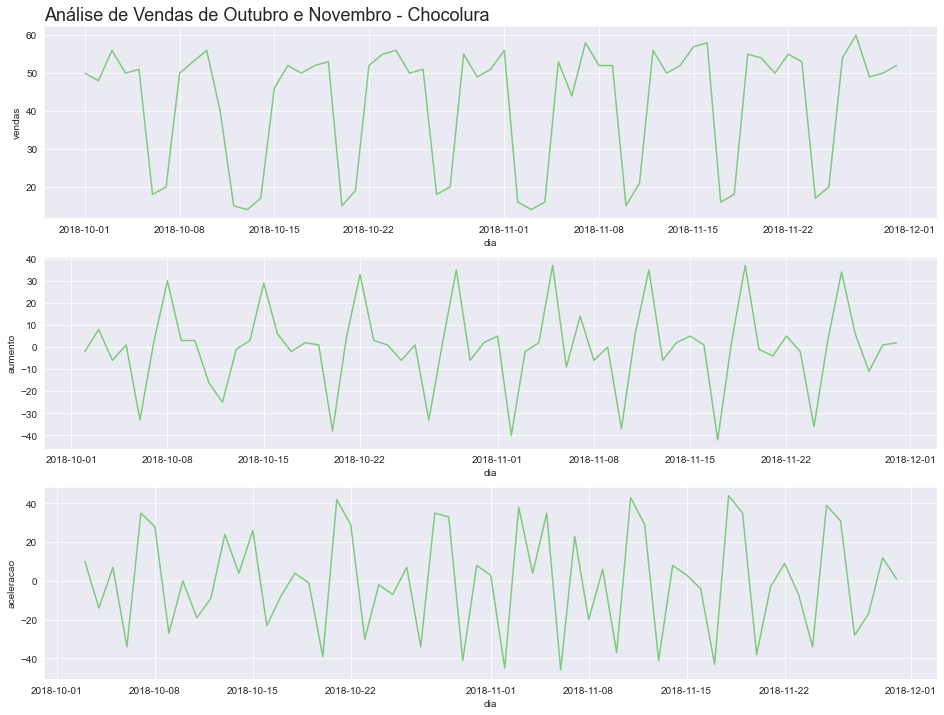

In [111]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Vendas de Outubro e Novembro - Chocolura')

## Analisando a Sazonalidade

In [121]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [122]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [123]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [124]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado',
       'Sunday':'Domingo'}

In [125]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [128]:
vendas_por_dia.head(20)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


## Agrupando os Dias

In [130]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-130-38016381f919>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [131]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Correlação das Vendas Diárias

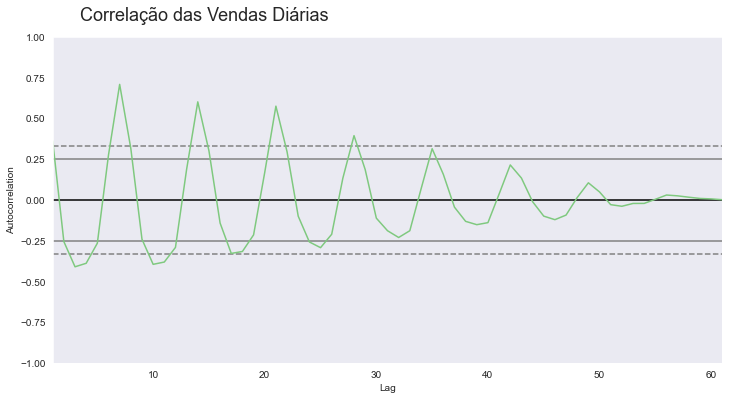

In [132]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas Diárias', fontsize = 18, x = 0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax 

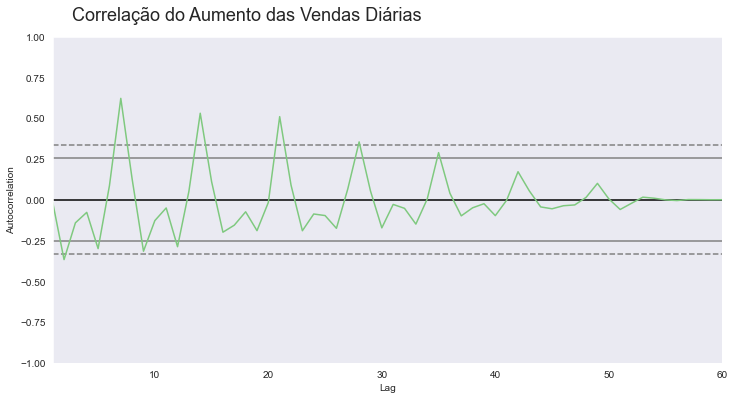

In [134]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize = 18, x = 0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax 

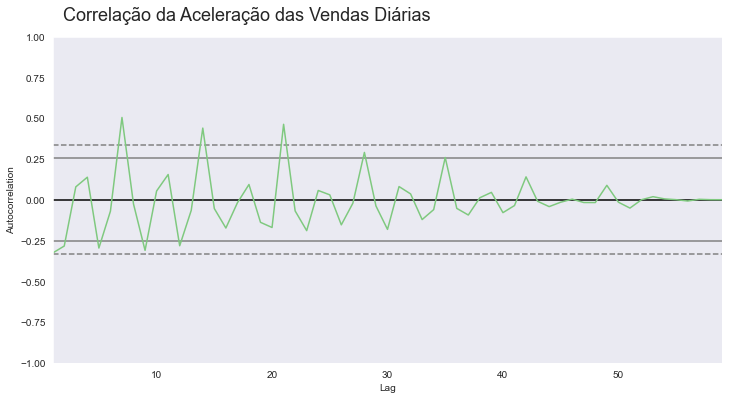

In [135]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Aceleração das Vendas Diárias', fontsize = 18, x = 0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax 

## Cafelura - Análise de Vendas

In [137]:
cafelura = pd.read_csv('cafelura.csv')

In [138]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [139]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [141]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [142]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [143]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


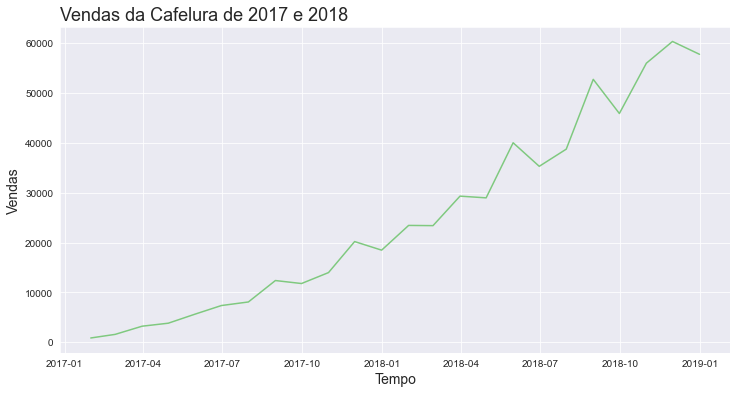

In [144]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

## Normalizando as Vendas por Finais de Semana

In [147]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [148]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [150]:
quantidade_de_dias_de_fde['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [151]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fde['quantidade_de_dias'].values

In [152]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


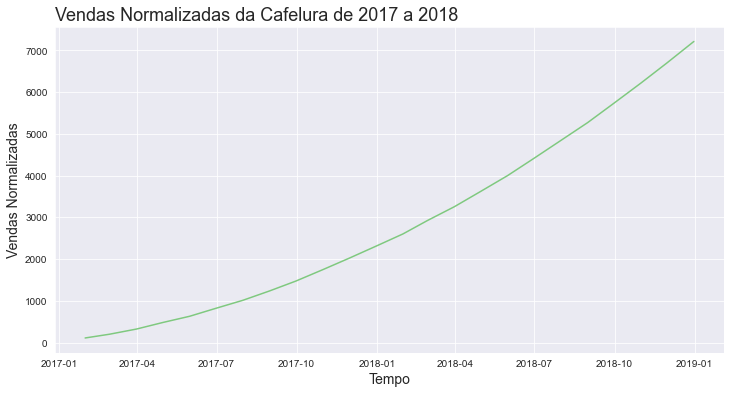

In [153]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

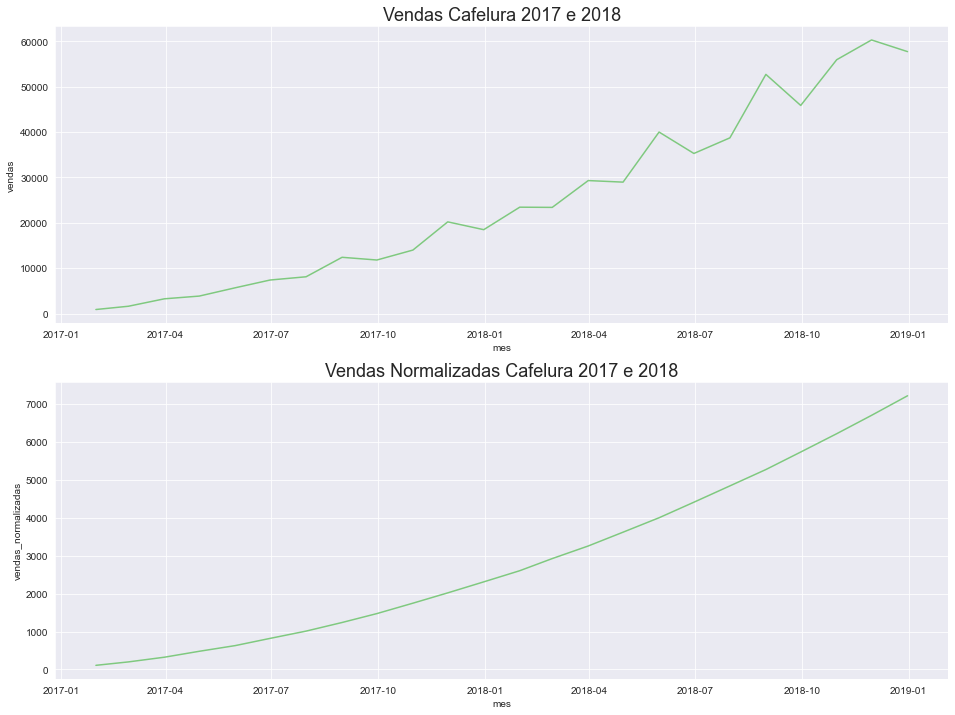

In [157]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax 

## Statsmodels

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose

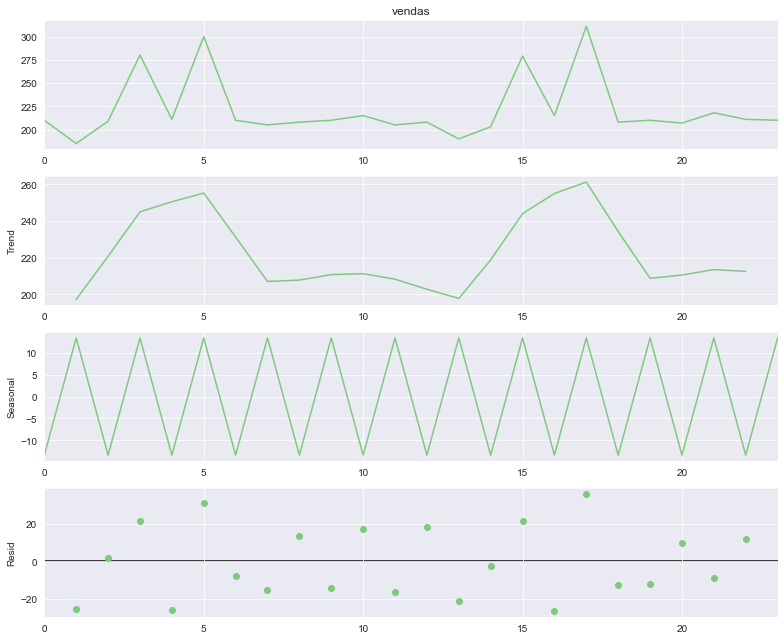

In [169]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

resultado = seasonal_decompose(chocolura['vendas'], period = 2)
resultado.plot()


plt.show()

In [170]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [171]:
data = ({'observacao': observacao, 'tendencia':tendencia, 'sazonalidade': sazonalidade, 'ruido': ruido})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


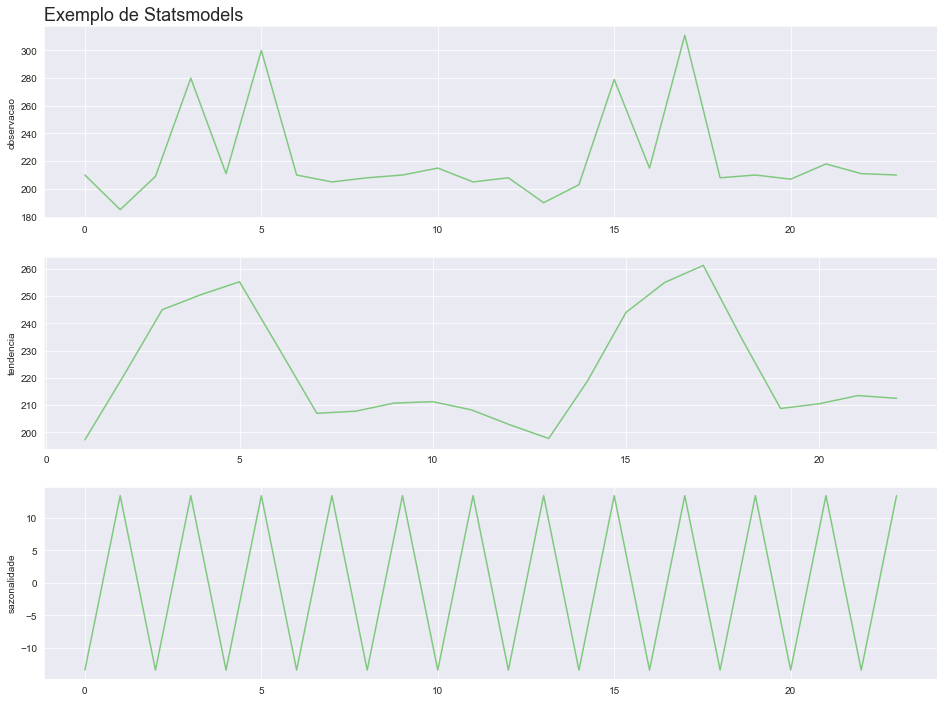

In [174]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

## Retirado do Fórum da Alura (Bonus)

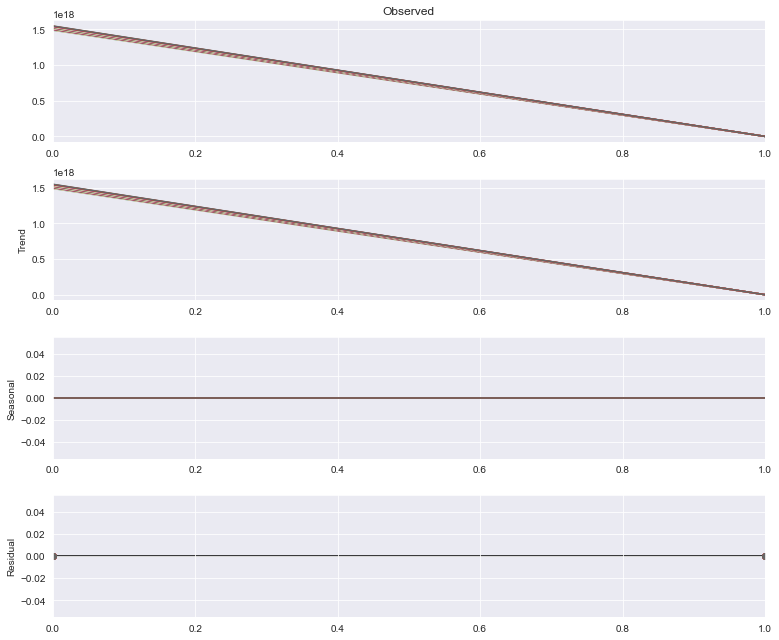

In [166]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

resultado = seasonal_decompose([cafelura['mes'],cafelura['vendas']], period=1)
resultado.plot()


plt.show()

## Alucel - Análise de Vendas

In [177]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [179]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [180]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [181]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [183]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [184]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


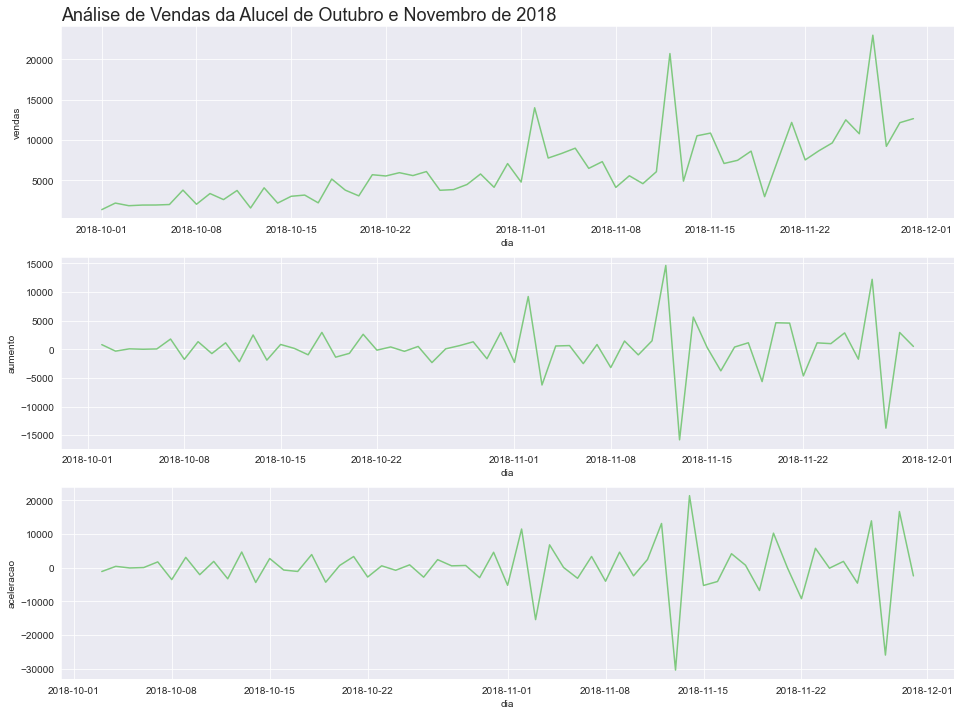

In [186]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas da Alucel de Outubro e Novembro de 2018')

## Aplicando Média Móvel

In [187]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [189]:
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


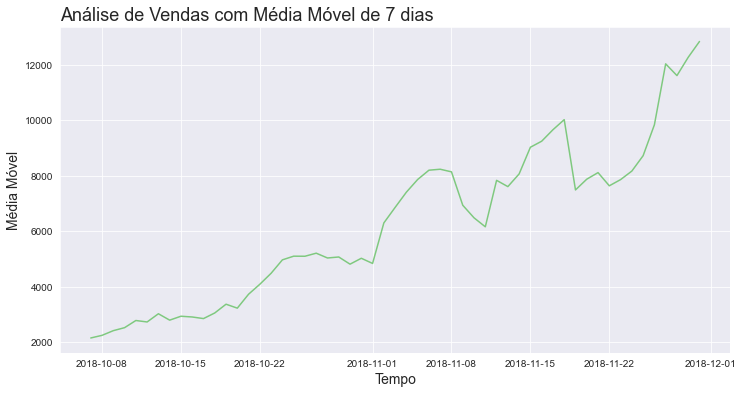

In [190]:
plotar('Análise de Vendas com Média Móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [191]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

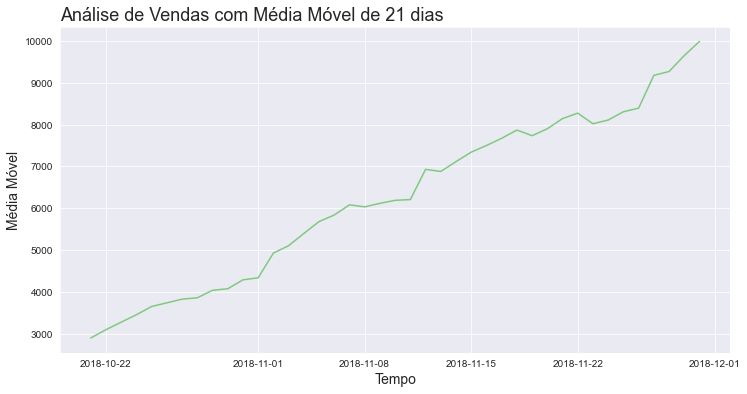

In [192]:
plotar('Análise de Vendas com Média Móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

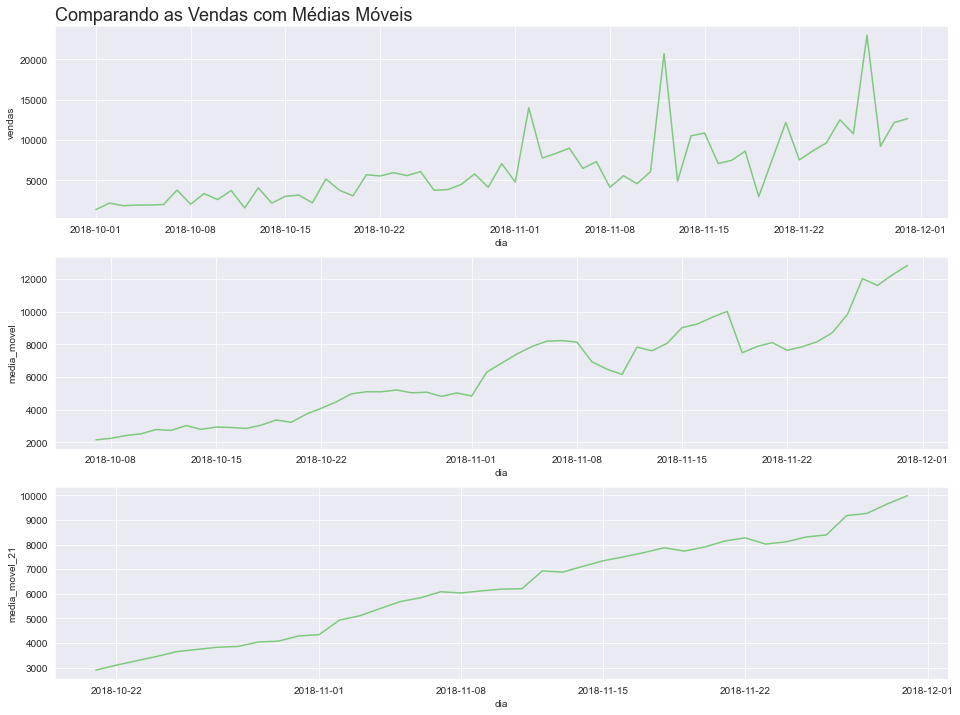

In [193]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as Vendas com Médias Móveis')